# Cellule d'entraînement
Il faut que le modèle existe pour pouvoir l'entraîner, afin de ne pas écraser par erreur des modèles entraînés, un autre fichier est (sera) disponible pour créer le modèle en question avant de l'entaîner

## Choix des paramètres:


Attention ce notebook est encore en développement, pour l'instant les paramètres disponibles sont :

    - optimizer : Adam
    - lossFunction : CrossEntropy
    - model_type : rnn, lstm, gru
    - alphabet : a0, a1, a2, a3, a5
    
Note : use_Paul_distance n'est disponible que pour l'alphabet a0 pour l'instant

In [17]:
params = {
        'print_every': 10,
        'plot_every': 10,
        'optimizer': "Adam",
        'lossFunction': "CrossEntropy",
        'model_type': "lstm",
        'alphabet': 'a0',
        'sequence_lenght': 16, 
        'using_cuda': True,
        'batch_size': 512,
        'shuffle': True, 
        'num_workers': 6,
        'hidden_size': 512,
        'num_layers': 2,
        'dropout': 0.1,
        'learning_rate': 5e-4, 
        'epochs': 50,
        'use_Paul_distance': True}

from GRUClass import MYGRU
from RNNClass import MYRNN
from LSTMClass import MYLSTM
import torch
import os
from utilities import chordUtil
from utilities.chordUtil import *


dropout = params['dropout']
model_type = params['model_type']
num_layers = params['num_layers']
hidden_size = params['hidden_size']
alphabet = params['alphabet']
sequence_lenght = params['sequence_lenght']
dropoutstr = str(dropout).replace('.',',')
model_string = "models/"+model_type+str(num_layers)+"layers"+str(hidden_size)+"blocks"+alphabet+"alphabet"+str(sequence_lenght)+"lenSeq"+dropoutstr+"dropout.pt"


# Getting alphabet size :
rootname = "inputs/jazz_xlab/"
filenames = os.listdir(rootname)
dictChord, listChord = chordUtil.getDictChord(eval(alphabet))
alphabet_size = len(dictChord)
#print(dictChord)

## Create a new network or load a trained one

### Create :

In [2]:
if model_type == "gru":
    myNetwork = MYGRU(alphabet_size, hidden_size, num_layers, dropout)
elif model_type == "lstm":
    myNetwork = MYLSTM(alphabet_size, hidden_size, num_layers, dropout)
elif model_type == "rnn":
    myNetwork = MYRNN(alphabet_size, hidden_size, num_layers, dropout)

### Load :

In [2]:
myNetwork = torch.load(model_string)

# Train and Test the Network on the RealBook dataset

In [18]:
myNetwork.trainAndTest(**params)

Trying using Cuda ...
OK
utilities.remapChordsToBase
a0
Start training
Train : 0m 13s (10 20%) loss : 0.0045, accuracy : 68.3236%
Test : 0m 14s (10 20%) loss : 0.0026, accuracy : 68.9764%
Train : 0m 28s (20 40%) loss : 0.0037, accuracy : 69.7655%
Test : 0m 28s (20 40%) loss : 0.0025, accuracy : 69.6638%
Train : 0m 42s (30 60%) loss : 0.0035, accuracy : 69.4138%
Test : 0m 43s (30 60%) loss : 0.0025, accuracy : 69.4380%
Train : 0m 56s (40 80%) loss : 0.0031, accuracy : 70.5744%
Test : 0m 57s (40 80%) loss : 0.0025, accuracy : 70.0953%
Finished Training


# Training and testing results

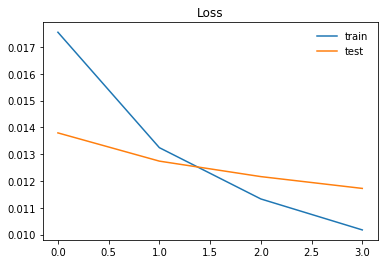

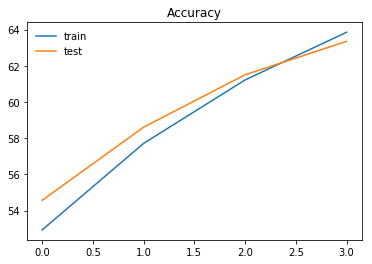

In [13]:
myNetwork.plotLastTraining()

# Save the Model

In [15]:
torch.save(myNetwork,myNetwork.toString(**params))
print("model saved as : "+myNetwork.toString(**params))

model saved as : models/lstm2layers512blocksa1alphabet16lenSeq0,1dropout.pt


# Results of all training sessions
Si une courbe n'apparait pas, c'est sûrement qu'elle est d'une couleur trop claire.

['coral', 'firebrick', 'palegreen', 'limegreen', 'mistyrose']


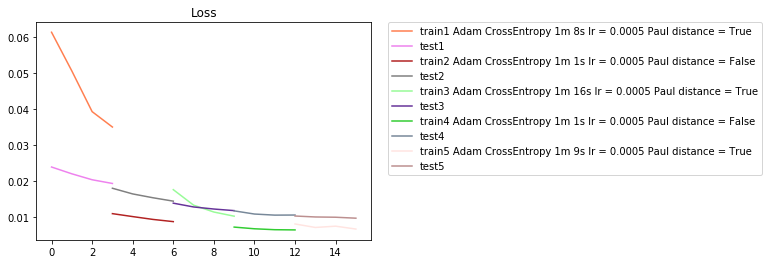

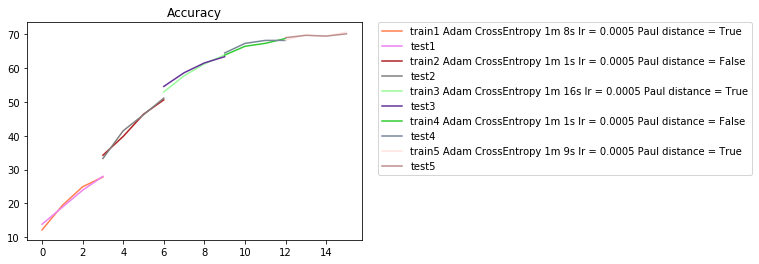

In [19]:
myNetwork.plotAllTraining()

# Training memory :
Les données relatifs aux entraînements sont stockées dans trainingData

In [6]:
print(["training number","optimizer used","LossFunction used","train loss","test loss","train accuracy","test accuracy","time", "use_Paul_distance"])
print("\n")
print(myNetwork.trainingData)

['training number', 'optimizer used', 'LossFunction used', 'train loss', 'test loss', 'train accuracy', 'test accuracy', 'time', 'use_Paul_distance']


[[0, 1], ['None', 'Adam'], ['None', 'CrossEntropy'], [[0], [0.061331410331329286, 0.05056840424313922, 0.03925022195964571, 0.03496878058308205]], [[0], [0.023848622059041973, 0.021959358620655026, 0.020306236830110003, 0.0192729806449036]], [[0], [12.180539273153576, 19.413833528722158, 24.92379835873388, 27.819460726846422]], [[0], [13.853487205218265, 18.886101354741598, 23.9136979427998, 28.003010536879074]], [0, '1m 8s'], [0, 0.0005], ['No', True]]
